In [500]:
import random
import numpy as np
import tensorflow as tf
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, make_classification, make_regression, make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Linear Regression

In [41]:
# ref:
# https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-5485abc9f2e4
# https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c

In [42]:
# linear regression with pure python version

**linear regression with numpy version**

Inital cost is : 296.0734584980237
Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]]
Final cost is:  [11.00713381]


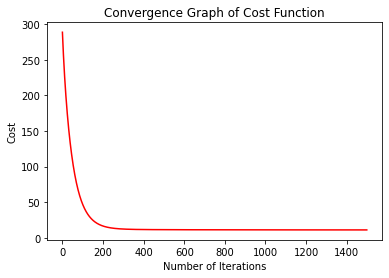

In [71]:
def compute_mse_cost(x, y, params):
    n_samples = len(y)
    y_hat = x @ params
    return (1/(2*n_samples))*np.sum((y_hat-y)**2)

def mse_gradient_descent(x, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters, 1))
    
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * x.T @ (x @ params - y)
        J_history[i] = compute_mse_cost(x, y, params)
    
    return J_history, params
# load data
ds = load_boston()
x = ds.data
y = ds.target[:,np.newaxis]

# make some data transformation before compute 
n_samples = len(y)

mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)

x = (x-mu)/sigma
x = np.hstack((np.ones((n_samples, 1)), x)) # add 1 for every case just for bias param
n_features = np.size(x,1)
params = np.zeros((n_features,1))

# compute the result
n_iters = 1500
learning_rate = 0.01
init_cost = compute_mse_cost(x, y, params)
print('Inital cost is :', init_cost)
J_hist , params = mse_gradient_descent(x,y,params, learning_rate, n_iters)
print("Optimal parameters are: \n", params)

print("Final cost is: ", J_hist[-1])

plt.plot(range(len(J_hist)), J_hist, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
# linear regression with tensorflow version

In [ ]:
# linear regression with pytorch version

Inital cost is : 0.246
Optimal parameters are: 
 [[0.49199986]
 [0.43250112]
 [0.00146203]]
Final cost is:  [0.03142496]


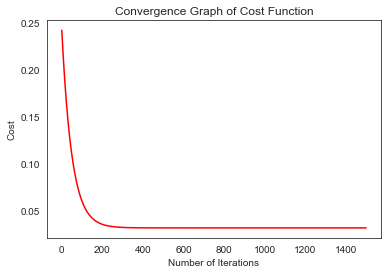

## Logistic Regression

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


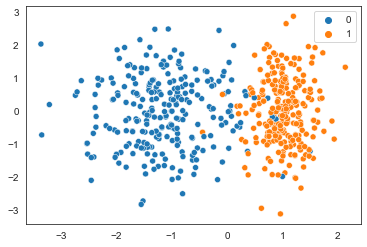

In [92]:
# prepared data 
x, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]
sns.set_style('white')
sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));

In [ ]:
# logistic regression with pure python version

**logistic regression with numpy version**

https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece

Inital cost is : [[0.69312718]]
Optimal parameters are: 
 [[-0.56988964]
 [-0.56988964]
 [ 5.06903386]
 [-0.01436046]]
Final cost is:  [0.11367902]


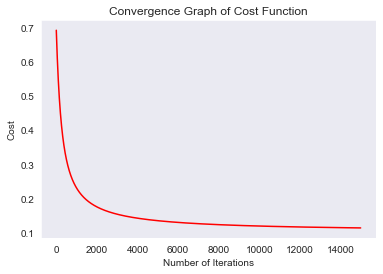

In [129]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_binaryCE_cost(x, y, params):
    n_samples = len(y)
    y_hat = sigmoid(x @ params)
    epsilon = 1e-5
    cost = (1/n_samples)*(((-y).T @ np.log(y_hat + epsilon)) - ((1-y).T @ np.log(1 - y_hat + epsilon)))
    return cost

def binaryCE_gradient_descent(x, y, params, laerning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters, 1))
    for i in range(n_iters):
        params = params - (laerning_rate/n_samples) * (x.T @ (sigmoid(x @ params) - y))
        J_history[i] = compute_binaryCE_cost(x, y ,params)

    return J_history, params

def bce_predict(x, params):
    return np.round(sigmoid(x @ params))

n_samples = len(y)
x = np.hstack((np.ones((n_samples, 1)), x))
n_features = np.size(x, axis=1)
params = np.zeros((n_features, 1))

n_iters = 15000
learning_rate = 0.01

init_cost = compute_binaryCE_cost(x,y, params)
print('Inital cost is :', init_cost)
J_hist , params = binaryCE_gradient_descent(x,y,params, learning_rate, n_iters)
print("Optimal parameters are: \n", params)

print("Final cost is: ", J_hist[-1])

plt.plot(range(len(J_hist)), J_hist, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


### Additional Experiments : can mse used for classification
CE output will contrain itself between labels

MSE output may override the boundary of [0,1]

https://stats.stackexchange.com/questions/46413/can-the-mean-squared-error-be-used-for-classification

In [138]:
x, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]
n_samples = len(y)
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)

x = (x-mu)/sigma
x = np.hstack((np.ones((n_samples, 1)), x))
n_features = np.size(x,1)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


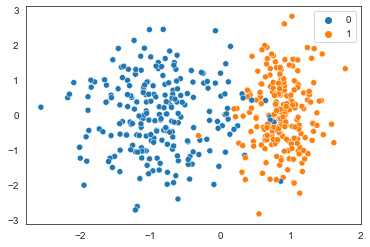

In [131]:
sns.set_style('white')
sns.scatterplot(x_train[:,1],x_train[:,2],hue=y_train.reshape(-1));

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


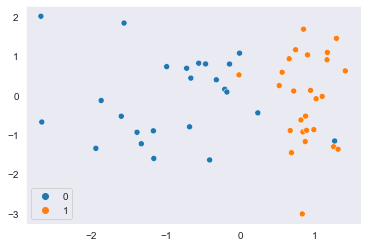

In [132]:
sns.set_style('dark')
sns.scatterplot(x_valid[:,1],x_valid[:,2],hue=y_valid.reshape(-1));

Inital cost is : 0.24444444444444444
Optimal parameters are: 
 [[4.90715072e-01]
 [4.41847149e-01]
 [3.89298481e-04]]
Final cost is:  [0.02965647]


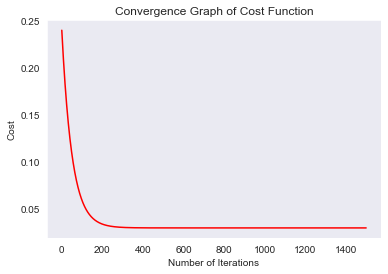

Predict acc: 0.9.
[ 0. -0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1. -0.  1.  0.  0. -0.  1.
  1. -0.  1.  0.  1.  1.  1.  0.  1. -0. -0.  1.  1.  1.  0.  1. -0. -0.
  1.  0.  1.  1.  0. -1.  1.  1.  1.  1.  1. -1.  1.  1.]


In [143]:
# fit data with mse and test the predict acc
x, y = x_train, y_train

# compute the result
params = np.zeros((n_features,1))
n_iters = 1500
learning_rate = 0.01
init_cost = compute_mse_cost(x, y, params)
print('Inital cost is :', init_cost)
J_hist , params = mse_gradient_descent(x,y,params, learning_rate, n_iters)
print("Optimal parameters are: \n", params)

print("Final cost is: ", J_hist[-1])

plt.plot(range(len(J_hist)), J_hist, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


def predict_mse(x, params):
    return x @ params

y_pred = np.round(predict_mse(x_valid,params))
print('Predict acc: {}.'.format(accuracy_score(y_true=y_valid,y_pred=y_pred)))
print(y_pred.reshape(-1))

Inital cost is : [[0.69312718]]
Optimal parameters are: 
 [[-0.16970442]
 [ 2.37104164]
 [ 0.02367742]]
Final cost is:  [0.19578527]


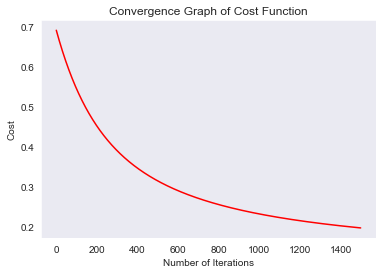

Predict acc: 0.94.
[0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1.]


In [142]:
# fit data with binary crossentropy and test the predict acc
x, y = x_train, y_train

# compute the result
params = np.zeros((n_features,1))
n_iters = 1500
learning_rate = 0.01
init_cost = compute_binaryCE_cost(x, y, params)
print('Inital cost is :', init_cost)
J_hist , params = binaryCE_gradient_descent(x,y,params, learning_rate, n_iters)
print("Optimal parameters are: \n", params)

print("Final cost is: ", J_hist[-1])

plt.plot(range(len(J_hist)), J_hist, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


y_pred = np.round(bce_predict(x_valid,params))
print('Predict acc: {}.'.format(accuracy_score(y_true=y_valid,y_pred=y_pred)))
print(y_pred.reshape(-1))

In [ ]:
# logistic regression with tensorflow version

In [ ]:
# logistic regression with pytorch version

## KNN

In [ ]:
# knn with pure python version

**knn with numpy version**

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


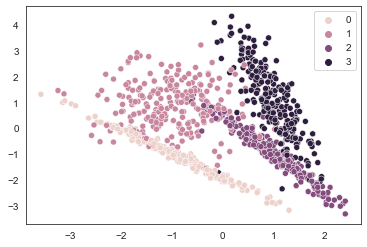

In [239]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=4, random_state=14)
sns.set_style('white')
sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));



In [240]:
y = y[:,np.newaxis]
n_samples = len(y)
mu = np.mean(x, axis=0)
sigma = np.std(x, axis=0)

x = (x-mu)/sigma

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

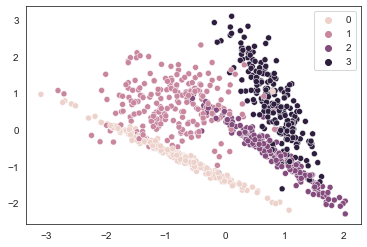

In [241]:
sns.set_style('white')
sns.scatterplot(x_train[:,0],x_train[:,1],hue=y_train.reshape(-1))

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

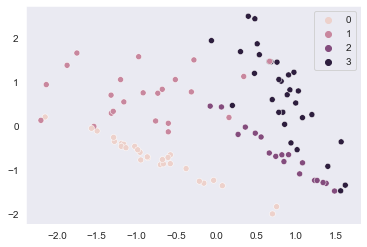

In [242]:
sns.set_style('dark')
sns.scatterplot(x_valid[:,0],x_valid[:,1],hue=y_valid.reshape(-1))

In [328]:
# knn with numpy version
# https://towardsdatascience.com/k-nearest-neighbors-classification-from-scratch-with-numpy-cb222ecfeac1
def euclidian_distance(a,b):
    return np.sqrt(np.sum((a-b)**2, axis=-1))

def manhattan_distance(a,b):
    return np.sum(np.abs((a-b)), axis=-1)

def chebychev_distance(a,b):
    return np.max(np.abs((a-b)), axis=-1)

def cosine_similarity(a,b):
    return (a @ b.T) / (np.linalg.norm(a,axis=-1)[:,np.newaxis] * np.linalg.norm(b,axis=-1)[:,np.newaxis].T)

def kneighbors(test_points, train_points, k_number=5, return_distance=False, distance_func=euclidian_distance):
    n_neighbors = k_number
    dist = []
    neighbor_idx = []
    
    point2distance = [distance_func(test_p, train_points) for test_p in test_points]
    for row in point2distance:
        enum_neighbors = enumerate(row)
        sorted_neighbors = sorted(enum_neighbors, key=lambda x:x[1])[:n_neighbors]
        
        idx_list = [x[0] for x in sorted_neighbors]
        dist_list = [x[1] for x in sorted_neighbors]
        dist.append(dist_list)
        neighbor_idx.append(idx_list)
    if return_distance:
        return np.array(dist), np.array(neighbor_idx)
    
    return np.array(neighbor_idx) # for each test point get n_neighbors nearest training points

def knn_predict(test_points, train_points, train_labels, class_num= 4, weights='uniform'):
    if weights=='uniform':
        neighbors = kneighbors(test_points, train_points)
        y_pred = np.array([np.argmax(np.bincount(train_labels[neighbor].reshape(-1))) for neighbor in neighbors])
        return y_pred
    
    if weight=='distance':
        distances, neighbors = kneighbors(test_points, train_points, return_distance=True)
        inverse_dist = 1 / distances
        mean_inverse_dist = inverse_dist / np.sum(inverse_dist, axis=1)[:,np.newaxis]
        probabilities = []
        for i, row in enumerate(mean_inverse_dist):
            row_pred = train_labels[neighbors[i]]
            for l in range(class_num):
                indices = np.where(row_pred==l)
                prod_idx = np.sum(row[indices])
                probabilities.append(np.array(prod_idx))
                
        predict_proba = np.array(probabilities).reshape(test_points.shape[0], class_num)
        y_pred = np.array([np.argmax(item) for item in predict_proba])
        return y_pred


def knn_score(test_points, test_labels, train_points=x_train, train_labels=y_train):
    y_pred = knn_predict(test_points, train_points, train_labels)
    return float(sum(y_pred==test_labels.reshape(-1)))/float(len(test_labels))

# valid_pred = knn_predict(x_valid, x_train, y_train)
score = knn_score(x_valid, y_valid)
print('Knn acc score {}'.format(score))

Knn acc score 0.98


In [ ]:
# knn with tensorflow version

In [ ]:
# knn with pytorch version

## K-means
ref: https://realpython.com/k-means-clustering-python/

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

/Users/davidzhang/miniconda3/envs/tf1.14_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


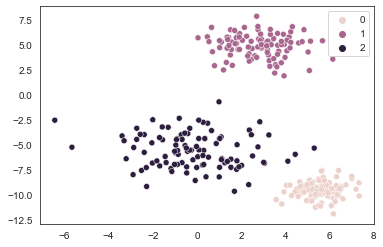

In [506]:
# prepare data 
x, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=[0.8, 1.3, 2], random_state=10)
sns.set_style('white')
sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));

In [ ]:
# kmeans with pure python version

**kmeans with numpy version**

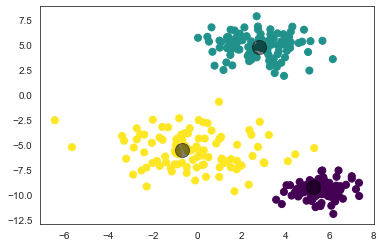

In [507]:
# kmeans with numpy version
def kmeans_update_centroids(train_points, y_hat, n_clusters):
    centroids = []
    for c in range(n_clusters):
        indices = np.where(y_hat==c)
        cluster = train_points[indices]
        centroids.append(list(np.mean(cluster,axis=0)))
    centroids = np.array(centroids)
    return centroids
    
def kmeans_update_point_cluster(train_points, centroids, distance_func=euclidian_distance):
    point2centroid_distance = -1 * euclidian_distance(train_points[:,np.newaxis], centroids)
    update_cluster = point2centroid_distance.argmax(axis=-1)
    return update_cluster

y = y[:,np.newaxis]
n_clusters = 3
n_samples = len(y)
n_iters = 500
cnt = 0
# random sampling the cluster label for train data 
np.random.seed(12) # K-means受初始化状态影响很大
# init random label for data points
y_hat = np.random.randint(n_clusters, size=n_samples)
centroids = kmeans_update_centroids(x, y_hat, n_clusters)
go = True
while cnt <= n_iters and go:
    new_y_hat = kmeans_update_point_cluster(x, centroids)
    new_centroids = kmeans_update_centroids(x, new_y_hat, n_clusters)
    if np.sum(euclidian_distance(centroids,new_centroids), axis=0) < 1e-2:
        go = False
        print("Frozen")
    cnt += 1
opt_centroids = new_centroids
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(opt_centroids[:, 0], opt_centroids[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# kmeans with tensorflow version

In [ ]:
# kmeans with pytorch version

### 复杂情况

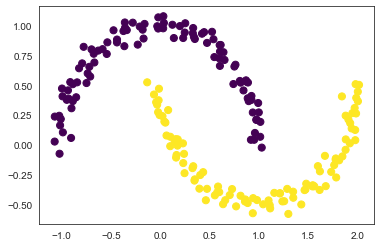

In [509]:
x, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')

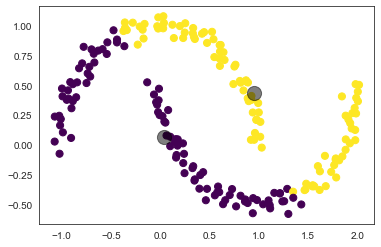

In [512]:
# 如果用kmeans聚类是这样
y = y[:,np.newaxis]
n_clusters = 2
n_samples = len(y)
n_iters = 500
cnt = 0
np.random.seed(12) # K-means受初始化状态影响很大
y_hat = np.random.randint(n_clusters, size=n_samples)
centroids = kmeans_update_centroids(x, y_hat, n_clusters)
go = True
while cnt <= n_iters and go:
    new_y_hat = kmeans_update_point_cluster(x, centroids)
    new_centroids = kmeans_update_centroids(x, new_y_hat, n_clusters)
    if np.sum(euclidian_distance(centroids,new_centroids), axis=0) < 1e-2:
        go = False
        print("Frozen")
    cnt += 1
opt_centroids = new_centroids
plt.scatter(x[:, 0], x[:, 1], c=new_y_hat, s=50, cmap='viridis')
plt.scatter(opt_centroids[:, 0], opt_centroids[:, 1], c='black', s=200, alpha=0.5);

## DBSCAN

In [ ]:
# dbscan with pure python version

In [ ]:
# dbscan with numpy version

In [ ]:
# dbscan with tensorflow version

In [ ]:
# dbscan with pytorch version

## SVM